In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_precision_recall_curve

import joblib
import matplotlib.pyplot as plt

def plot_metrics(clf, test_x, test_y, clf_name):
    plt.style.use('fivethirtyeight')

    plot_confusion_matrix(clf, test_x, test_y)
    plt.title(f'Confusion matrix for {clf_name}')

    plot_precision_recall_curve(clf, test_x, test_y)
    plt.title(f'Precision Recall curve for {clf_name}')

In [2]:
X = joblib.load('../../data/Features.joblib')
y = joblib.load('../../data/Lables.joblib')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34000,) (34000,)
(6000,) (6000,)


In [5]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [6]:
joblib.dump(value=vectorizer, filename='../models/vectorizer.joblib', compress=True)

['../models/vectorizer.joblib']

F1 for logistic_regression: 85.0
F1 for multinomial_nb: 84.0
F1 for decision_tree: 69.0
F1 for random_forest: 80.0
F1 for xgb: 83.0


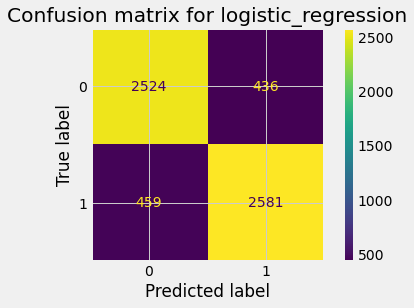

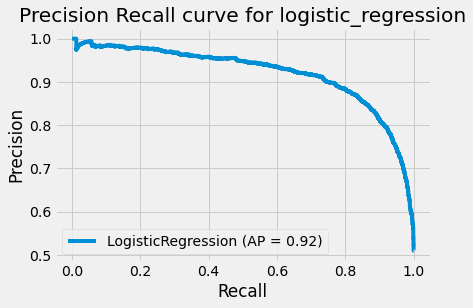

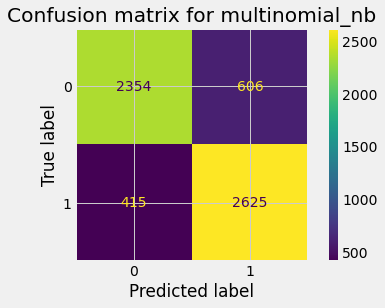

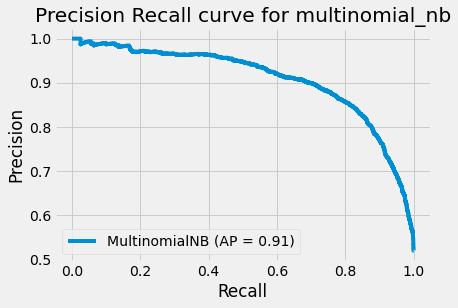

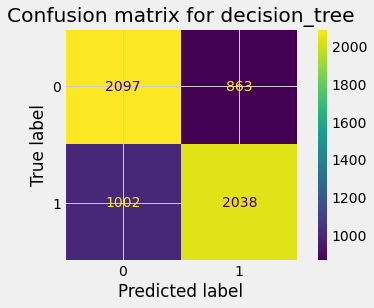

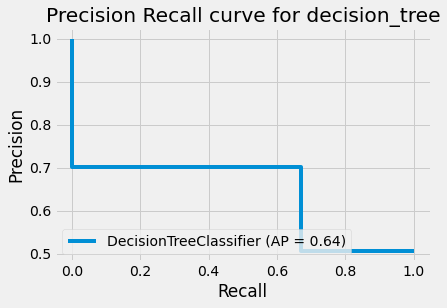

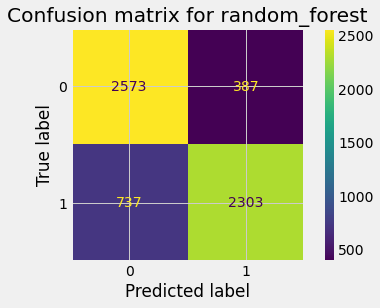

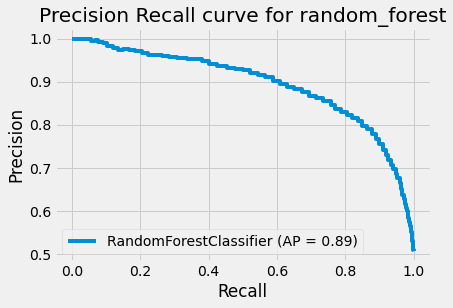

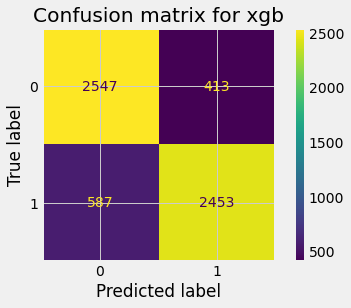

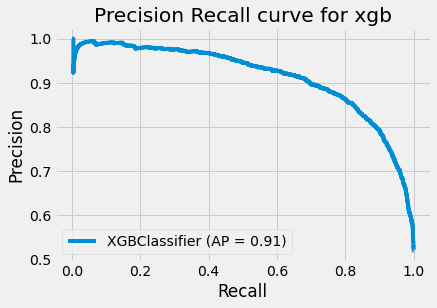

In [7]:
classifiers = {
    'logistic_regression': LogisticRegression(),
    'multinomial_nb': MultinomialNB(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'xgb': XGBClassifier()
}

for name, _ in classifiers.items():
    classifiers[name].fit(X_train, y_train)
    preds = classifiers[name].predict(X_test)
    f1 = round(f1_score(y_true=y_test, y_pred=preds), 2) * 100
    print(
        f'F1 for {name}: {f1}'
    )
    plot_metrics(clf=classifiers[name], test_x=X_test, test_y=y_test, clf_name=name)

In [8]:
joblib.dump(value=classifiers['logistic_regression'], filename='../models/lr_model.joblib', compress=True)

['../models/lr_model.joblib']